In [105]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
btc= pd.read_csv('./input/bitcoin_price.csv', parse_dates=['Date'])
eth = pd.read_csv('./input/ethereum_price.csv', parse_dates=['Date'])
bch = pd.read_csv('./input/bitcoin_cash_price.csv', parse_dates=['Date'])
#bitconn=pd.read_csv('bitconnect_price.csv')
dash=pd.read_csv('./input/dash_price.csv', parse_dates=['Date'])
ethcls=pd.read_csv('./input/ethereum_classic_price.csv', parse_dates=['Date'])
iota = pd.read_csv('./input/iota_price.csv', parse_dates=['Date'])
litecoin = pd.read_csv('./input/litecoin_price.csv', parse_dates=['Date'])
monero = pd.read_csv('./input/monero_price.csv', parse_dates=['Date'])
nem = pd.read_csv('./input/nem_price.csv', parse_dates=['Date'])
neo = pd.read_csv('./input/neo_price.csv', parse_dates=['Date'])
numeraire = pd.read_csv('./input/numeraire_price.csv', parse_dates=['Date'])
ripple = pd.read_csv('./input/ripple_price.csv', parse_dates=['Date'])
stratis = pd.read_csv('./input/stratis_price.csv', parse_dates=['Date'])
waves = pd.read_csv('./input/waves_price.csv', parse_dates=['Date'])


In [3]:
waves.iloc[::-1].head()

,Date,Open,High,Low,Close,Volume,Market Cap
523,2016-06-02,1.330000,1.39,1.150000,1.210000,"83,734",-
522,2016-06-03,1.290000,1.66,0.727579,1.090000,"57,721",-
521,2016-06-04,1.090000,1.29,0.575898,0.586993,"4,912",-
520,2016-06-05,0.587588,1.11,0.580745,0.713006,"41,700",-
519,2016-06-06,0.712541,1.17,0.712541,0.768672,"95,573",-


In [3]:
btc = btc.iloc[::-1]
eth = eth.iloc[::-1]
bch = bch.iloc[::-1]
dash= dash.iloc[::-1]
ethcls= ethcls.iloc[::-1]
iota = iota.iloc[::-1]
litecoin = litecoin.iloc[::-1]
monero = monero.iloc[::-1]
nem = nem.iloc[::-1]
neo = neo.iloc[::-1]
numeraire = numeraire.iloc[::-1]
ripple = ripple.iloc[::-1]
stratis = stratis.iloc[::-1]
waves = waves.iloc[::-1]


In [96]:
ripple = b.iloc[::-1]

In [126]:
bch.head()

,Date,Open,High,Low,Close,Volume,Market Cap
107,2017-07-23,555.89,578.97,411.78,413.06,"85,013",-
106,2017-07-24,412.58,578.89,409.21,440.70,"190,952",-
105,2017-07-25,441.35,541.66,338.09,406.90,"524,908",-
104,2017-07-26,407.08,486.16,321.79,365.82,"1,784,640",-
103,2017-07-27,417.10,460.97,367.78,385.48,"533,207",-


In [171]:
df_crypto = pd.DataFrame(numeraire)

df_crypto = df_crypto[['Date','Close']]
df_crypto.set_index('Date', inplace = True)

df_crypto = df_crypto['Close']
df_crypto.head()

Date
2017-06-23     45.63
2017-06-24    101.83
2017-06-25     86.55
2017-06-26     59.90
2017-06-27     53.05
Name: Close, dtype: float64

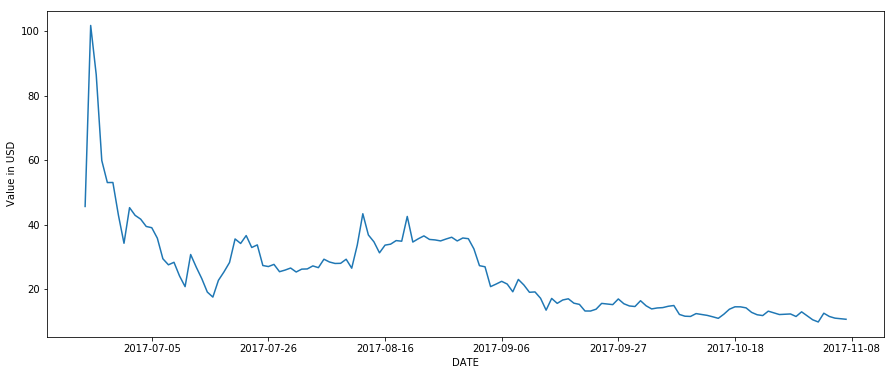

In [172]:
plt.plot(df_crypto)
plt.ylabel("Value in USD")
plt.xlabel("DATE")
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  137
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -427.184
Method:                       css-mle   S.D. of innovations              5.418
Date:                Wed, 13 Dec 2017   AIC                            868.368
Time:                        02:10:36   BIC                            888.808
Sample:                    06-24-2017   HQIC                           876.674
                         - 11-07-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3661      0.237     -1.547      0.124      -0.830       0.098
ar.L1.D.Close     0.0006      0.124      0.005      0.996      -0.243       0.244
ar.L2.D.Close    -0.5876      0.119     

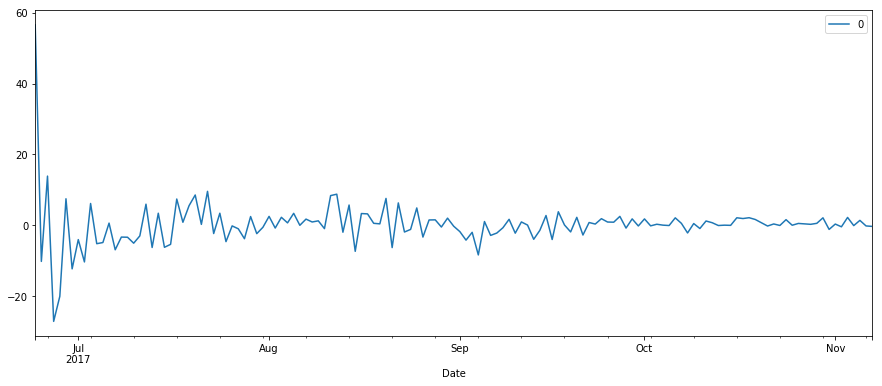

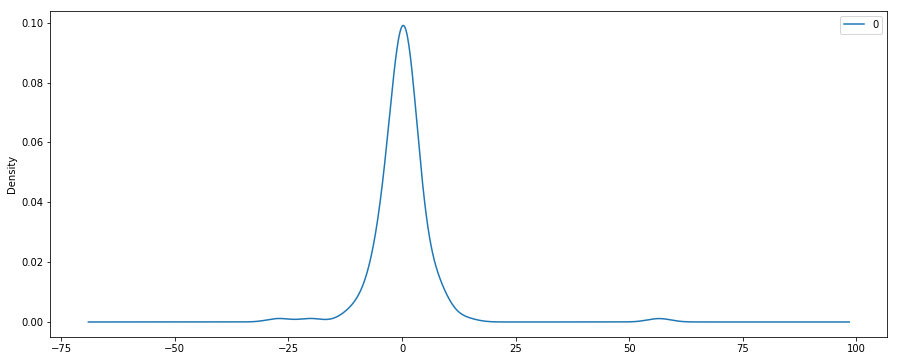

                0
count  137.000000
mean     0.177736
std      6.838080
min    -27.162819
25%     -1.925609
50%      0.246799
75%      1.835397
max     56.566128


In [173]:
# fit model
model = ARIMA(df_crypto, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [174]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_crypto.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = np.zeros((len(test)+50))
print(len(test))
average=0
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions[t]=yhat
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    average=average+((math.fabs(yhat-obs))/obs)
   # print('average',average)
#error = mean_squared_error(test, predictions)
avg=(average/len(test))*100
print('Test',avg)
#print('predicted',predictions)
#r2 =r2_score(test,predictions)

#print('Test MSE: %.3f' % error)
#print('r2 score:',r2)
# plot
#print(error)


28
predicted=11.029650, expected=12.360000
predicted=11.275072, expected=12.100000
predicted=11.728879, expected=11.810000
predicted=11.213146, expected=11.370000
predicted=10.788542, expected=10.890000
predicted=9.952669, expected=12.170000
predicted=11.719768, expected=13.720000
predicted=12.253371, expected=14.470000
predicted=12.759963, expected=14.460000
predicted=13.367605, expected=14.140000
predicted=12.922213, expected=12.740000
predicted=11.601275, expected=12.000000
predicted=11.780054, expected=11.750000
predicted=11.506392, expected=13.120000
predicted=12.581855, expected=12.600000
predicted=11.524896, expected=12.070000
predicted=11.753758, expected=12.160000
predicted=11.962520, expected=12.250000
predicted=10.913234, expected=11.460000
predicted=10.800931, expected=12.910000
predicted=12.847235, expected=11.660000
predicted=10.097804, expected=10.440000
predicted=10.203720, expected=9.760000
predicted=10.263746, expected=12.480000
predicted=11.593638, expected=11.470000

In [176]:

for t in range(50):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    x=t+len(test)
    predictions[x]=yhat
    obs = yhat
    history.append(obs)
print("Done")

Done


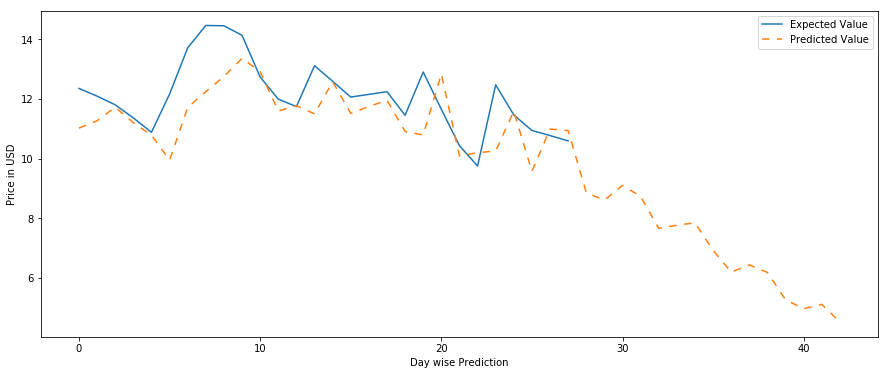

In [177]:
plt.plot(test,label="Expected Value")
plt.plot(predictions[:-35],dashes=[5,5,5,5],label="Predicted Value")
plt.ylabel("Price in USD")
plt.xlabel("Day wise Prediction")
plt.legend(loc='best')
plt.show(block='False')